# Timeseries Analysis of Appliance and Light Usage

## Frame the problem and look at the big picture

Please see the report on this project in the [repository](https://github.com/parksjr5/Energy_Forecasting).

## Get the data

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import grangercausalitytests

/Users/jessicaparks/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/jessicaparks/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# import data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
df.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [3]:
# data dimensions
df.shape

(19735, 29)

In [4]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### Create train and test data

In [5]:
df_train, df_test = df[0:-int(.8*df.shape[0])], df[-int(.8*df.shape[0]):]
print(df_train.shape)
print(df_test.shape)

(3947, 29)
(15788, 29)


In [6]:
# create exploratory data
exp_df = df_train

## Explore the data

#### Attribute and Characteristics

In [7]:
# column names
exp_df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
# check for missing values
exp_df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [9]:
# check data types of each column
exp_df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

#### Visualize Data

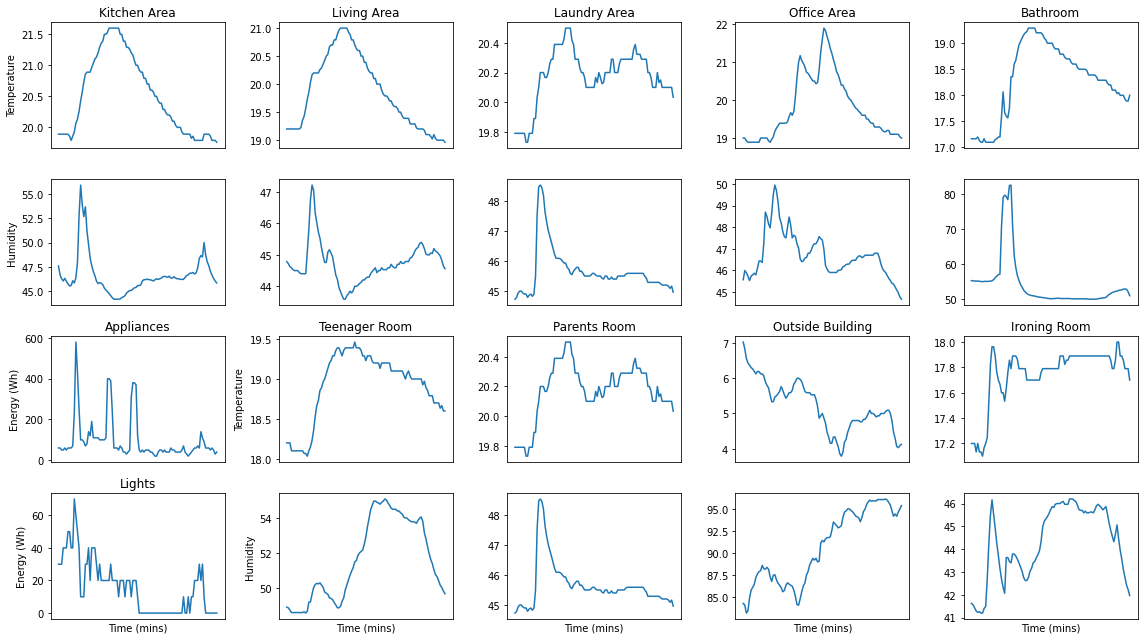

In [10]:
fig, ax = plt.subplots(4,5, figsize=(16,9))

ax[0,0].plot(exp_df['date'].loc[:100,], exp_df['T1'].loc[:100,])
ax[0,0].tick_params(labelbottom = False, bottom = False)
ax[0,0].set_ylabel('Temperature')
ax[1,0].plot(exp_df['date'].loc[:100,], exp_df['RH_1'].loc[:100,])
ax[1,0].tick_params(labelbottom = False, bottom = False)
ax[1,0].set_ylabel('Humidity')
ax[0,0].set_title('Kitchen Area')

ax[0,1].plot(exp_df['date'].loc[:100,], exp_df['T2'].loc[:100,])
ax[0,1].tick_params(labelbottom = False, bottom = False)
ax[1,1].plot(exp_df['date'].loc[:100,], exp_df['RH_2'].loc[:100,])
ax[1,1].tick_params(labelbottom = False, bottom = False)
ax[0,1].set_title('Living Area')

ax[0,2].plot(exp_df['date'].loc[:100,], exp_df['T3'].loc[:100,])
ax[0,2].tick_params(labelbottom = False, bottom = False)
ax[1,2].plot(exp_df['date'].loc[:100,], exp_df['RH_3'].loc[:100,])
ax[1,2].tick_params(labelbottom = False, bottom = False)
ax[0,2].set_title('Laundry Area')

ax[0,3].plot(exp_df['date'].loc[:100,], exp_df['T4'].loc[:100,])
ax[0,3].tick_params(labelbottom = False, bottom = False)
ax[1,3].plot(exp_df['date'].loc[:100,], exp_df['RH_4'].loc[:100,])
ax[1,3].tick_params(labelbottom = False, bottom = False)
ax[0,3].set_title('Office Area')

ax[0,4].plot(exp_df['date'].loc[:100,], exp_df['T5'].loc[:100,])
ax[0,4].tick_params(labelbottom = False, bottom = False)
ax[1,4].plot(exp_df['date'].loc[:100,], exp_df['RH_5'].loc[:100,])
ax[1,4].tick_params(labelbottom = False, bottom = False)
ax[0,4].set_title('Bathroom')

ax[2,0].plot(exp_df['date'].loc[:100,], exp_df['Appliances'].loc[:100,])
ax[2,0].tick_params(labelbottom = False, bottom = False)
ax[2,0].set_ylabel('Energy (Wh)')
ax[2,0].set_title('Appliances')
ax[3,0].plot(exp_df['date'].loc[:100,], exp_df['lights'].loc[:100,])
ax[3,0].tick_params(labelbottom = False, bottom = False)
ax[3,0].set_ylabel('Energy (Wh)')
ax[3,0].set_title('Lights')
ax[3,0].set_xlabel('Time (mins)')

ax[2,1].plot(exp_df['date'].loc[:100,], exp_df['T8'].loc[:100,])
ax[2,1].tick_params(labelbottom = False, bottom = False)
ax[2,1].set_ylabel('Temperature')
ax[3,1].plot(exp_df['date'].loc[:100,], exp_df['RH_8'].loc[:100,])
ax[3,1].set_xlabel('Time (mins)')
ax[3,1].set_ylabel('Humidity')
ax[3,1].tick_params(labelbottom = False, bottom = False)
ax[2,1].set_title('Teenager Room')

ax[2,2].plot(exp_df['date'].loc[:100,], exp_df['T3'].loc[:100,])
ax[2,2].tick_params(labelbottom = False, bottom = False)
ax[3,2].plot(exp_df['date'].loc[:100,], exp_df['RH_3'].loc[:100,])
ax[3,2].tick_params(labelbottom = False, bottom = False)
ax[3,2].set_xlabel('Time (mins)')
ax[2,2].set_title('Parents Room')

ax[2,3].plot(exp_df['date'].loc[:100,], exp_df['T6'].loc[:100,])
ax[2,3].tick_params(labelbottom = False, bottom = False)
ax[3,3].plot(exp_df['date'].loc[:100,], exp_df['RH_6'].loc[:100,])
ax[3,3].tick_params(labelbottom = False, bottom = False)
ax[3,3].set_xlabel('Time (mins)')
ax[2,3].set_title('Outside Building')

ax[2,4].plot(exp_df['date'].loc[:100,], exp_df['T7'].loc[:100,])
ax[2,4].tick_params(labelbottom = False, bottom = False)
ax[3,4].plot(exp_df['date'].loc[:100,], exp_df['RH_7'].loc[:100,])
ax[3,4].tick_params(labelbottom = False, bottom = False)
ax[3,4].set_xlabel('Time (mins)')
ax[2,4].set_title('Ironing Room')


plt.tight_layout()

#### Check for Correlations Between Attributes

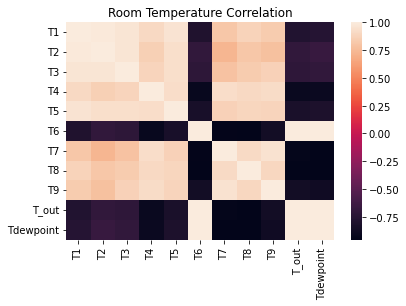

In [11]:
#looking at Temperature columns
# regex = '^T' means starts with T
filt = exp_df.filter(regex='^T', axis='columns').corr()
ax = plt.axes()
sns.heatmap(filt.corr(), ax = ax)
ax.set_title('Room Temperature Correlation')
plt.show()

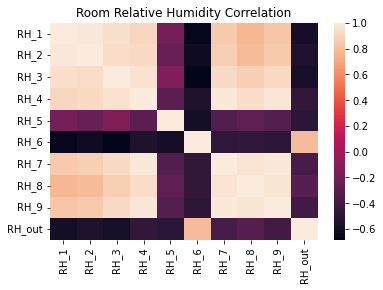

In [12]:
#looking at Relative Humidity columns
# regex = '^R' means starts with R
filt = exp_df.filter(regex='^R', axis='columns').corr()
ax = plt.axes()
sns.heatmap(filt.corr(), ax = ax)
ax.set_title('Room Relative Humidity Correlation')
plt.show()

#### Check for Potential Transformation Needs

In [13]:
# rolling mean based on last 5 values
exp_df['rolling_mean_app'] = exp_df['Appliances'].rolling(5).mean()
exp_df['rolling_mean_lights'] = exp_df['lights'].rolling(5).mean()

/var/folders/fp/pjncp27d79jfy3gyrwsbxvy40000gn/T/ipykernel_8920/2280145395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['rolling_mean_app'] = exp_df['Appliances'].rolling(5).mean()
/var/folders/fp/pjncp27d79jfy3gyrwsbxvy40000gn/T/ipykernel_8920/2280145395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['rolling_mean_lights'] = exp_df['lights'].rolling(5).mean()


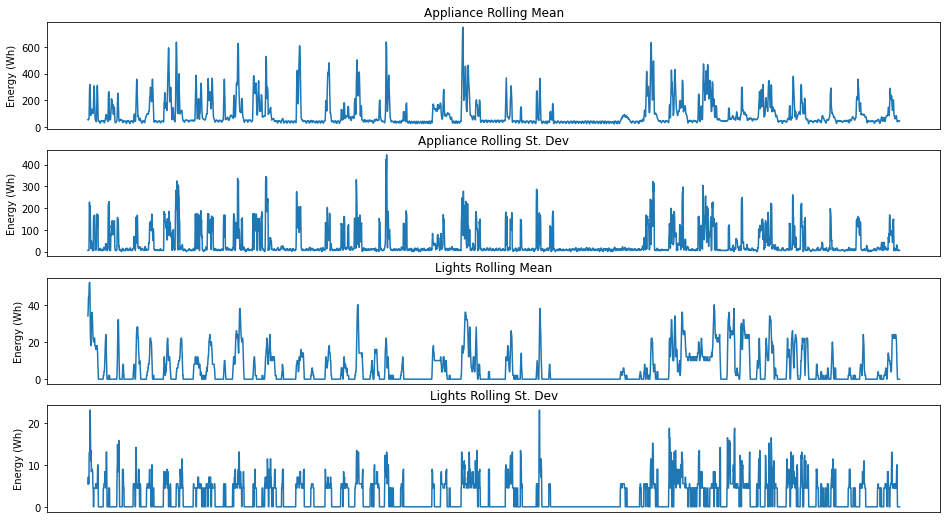

In [14]:
fig, ax = plt.subplots(4,1, figsize=(16,9))

ax[0].plot(exp_df['date'], exp_df['rolling_mean_app'])
ax[0].set_title('Appliance Rolling Mean')
ax[0].set_ylabel('Energy (Wh)')
ax[0].tick_params(labelbottom = False, bottom = False)

ax[1].plot(exp_df['date'], exp_df['Appliances'].rolling(5).std())
ax[1].set_title('Appliance Rolling St. Dev')
ax[1].set_ylabel('Energy (Wh)')
ax[1].tick_params(labelbottom = False, bottom = False)

ax[2].plot(exp_df['date'], exp_df['rolling_mean_lights'])
ax[2].set_title('Lights Rolling Mean')
ax[2].set_ylabel('Energy (Wh)')
ax[2].tick_params(labelbottom = False, bottom = False)

ax[3].plot(exp_df['date'], exp_df['lights'].rolling(5).std())
ax[3].set_title('Lights Rolling St. Dev')
ax[3].set_ylabel('Energy (Wh)')
ax[3].tick_params(labelbottom = False, bottom = False)

In [15]:
exp_df = exp_df.drop(['rolling_mean_lights', 'rolling_mean_app'], axis=1)

#### Document what you have learned

There are many basic points of interest and relationships we are able to see just from our exploratory data analysis. For example, there are no missing data points.If we did have missing data though, we would have been able to reasonably use the value of the point before; this is because the data was taken every ten minutes and the temperature and humidity do not significantly change in that time. When we look at the line graphs we can see the trends of energy usage by appliances and lights in the bottom left hand column. In the right above their graphs, we can see the temperature and relative humidity of the kitchen (chosen since many appliances are in this one room). Based on the graphs of all the rooms, we can see there is an overall spike and decline. Look more closely though, and we see these spikes and declines are not all the same. Interestingly, the graphs of the appliances and lights have a greater amount of spikes and variations then most rooms.<br/><br/>
Upon first glance, these correlation plots reveal a few interesting things. It appears there is not as much of a correlation between temperature and the appliance and lights as there is for relative humidity and appliances and lights. <br/><br/>
Just from these two plots, we hypothesize that relative humidity has a stronger impact on the energy usage of lights rather than appliances. On the flipside, we hypothesize temperature has a stronger impact on the energy usage of appliances than lights.   <br/><br/>
We now must look more closely at relationships that are significant for mulitvariate timeseries forecasting. It is important to see if the data is stationary or not so we will know if we will need to apply transformations to our data. Upon first glance, it is clear the mean and standard deviation of both the appliances and the lights are not stationary - meaning their values are not maintaining a consistent value. This implies transformations will be needed in the next section.

## Prepare the Data

#### Data Cleaning

In [16]:
exp_df.loc['date'] = pd.to_datetime(exp_df['date'].loc[:])

#### Feature Engineering

In [17]:
import statsmodels as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

**1. Stationarity**

Using Augmented Dickey–Fuller test to check for stationarity.  

*Null hypothesis:* If failed to be rejected, it suggests the time series is not stationary  
*Alternative hypothesis:* The null hypothesis is rejected, it suggests the time series IS stationary.<br/><br/>
If p-values are less than or equal to 0.05 so we can reject the null hypothesis and the data is stationary.

In [18]:
def adf_test(col, df):
    result = adfuller(df.values)
    # print if not stationary
    if result[1] > 0.05:
        print('Non-stationary column:', col)
        print('p-value:', result[1])
        print('ADF Statistics:', result[0])
        print('p-value:', result[1])
        print('Critical values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

In [19]:
exp_df.replace([np.inf, -np.inf], np.nan)
exp_df.dropna(inplace=True)
for col in exp_df.columns[1:]:
    adf_test(col, exp_df[col])

Non-stationary column: T3
p-value: 0.060969896660026
ADF Statistics: -2.781469242715896
p-value: 0.060969896660026
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Non-stationary column: RH_4
p-value: 0.14516801656367617
ADF Statistics: -2.3879442132220974
p-value: 0.14516801656367617
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Non-stationary column: T6
p-value: 0.0916161706377504
ADF Statistics: -2.6067207256411047
p-value: 0.0916161706377504
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Non-stationary column: T9
p-value: 0.8296947297501884
ADF Statistics: -0.7631958768430286
p-value: 0.8296947297501884
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Non-stationary column: T_out
p-value: 0.14591478201974
ADF Statistics: -2.385347376721545
p-value: 0.14591478201974
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Non-stationary column: Press_mm_hg
p-value: 0.06286481991932881
ADF Statistics: -2.7688375500377695
p-value: 0.06286481991932881
Critical val

**2. Autocorrelation and Lag Variables**

Autocorrelation is the correlation between a timeseries and the delayed version of itself. ACF is used to show the correlation coefficient against the lag and 0 means there is no correlation. The blue shading is the error bar. This shows the correlation to be at or near zero when the lag is about 25.<br/><br/>
PACF captures a “direct” correlation between time series and a lagged version of itself.

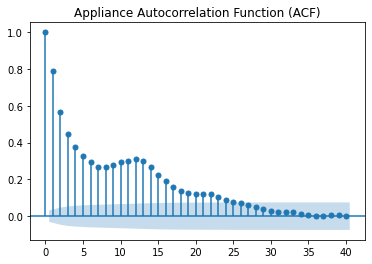

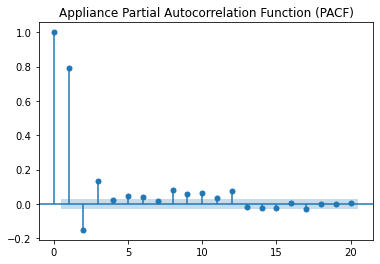

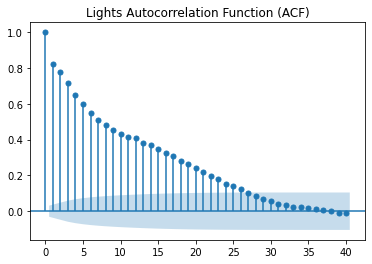

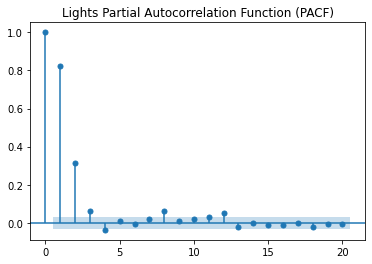

In [20]:
# Plot the ACF and PACF plots
plot_acf(exp_df['Appliances'], lags=40, title ='Appliance Autocorrelation Function (ACF)')
plot_pacf(exp_df['Appliances'], lags=20, title ='Appliance Partial Autocorrelation Function (PACF)')
plot_acf(exp_df['lights'],lags=40, title = 'Lights Autocorrelation Function (ACF)')
plot_pacf(exp_df['lights'],lags=20, title='Lights Partial Autocorrelation Function (PACF)')

plt.show()

**3. Seasonality, Trend, Residuals**

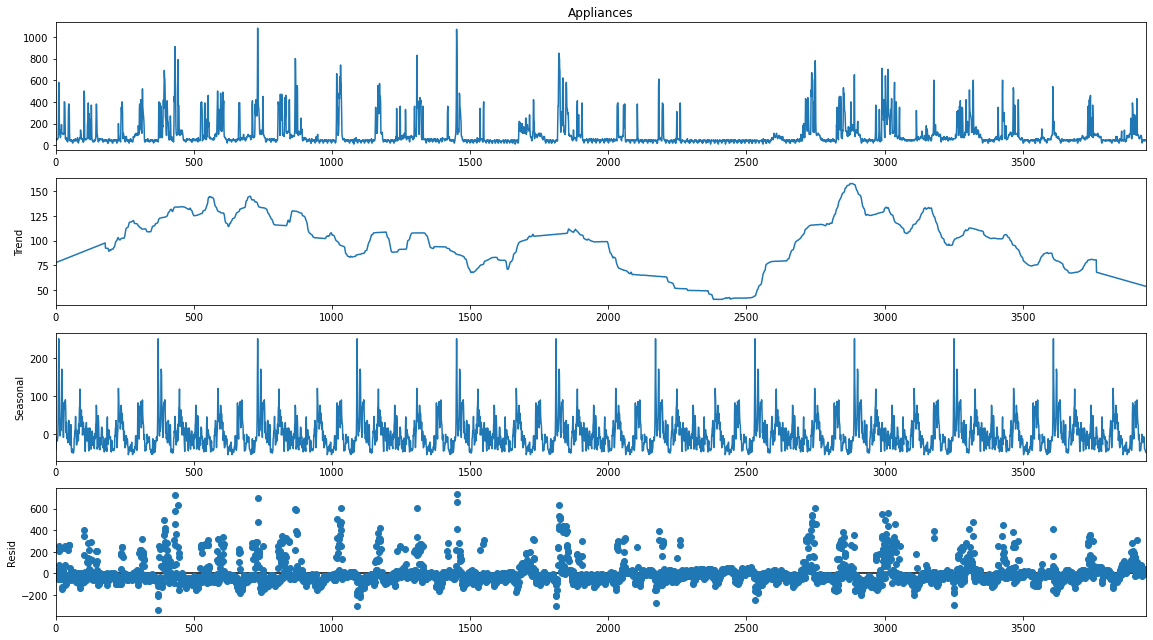

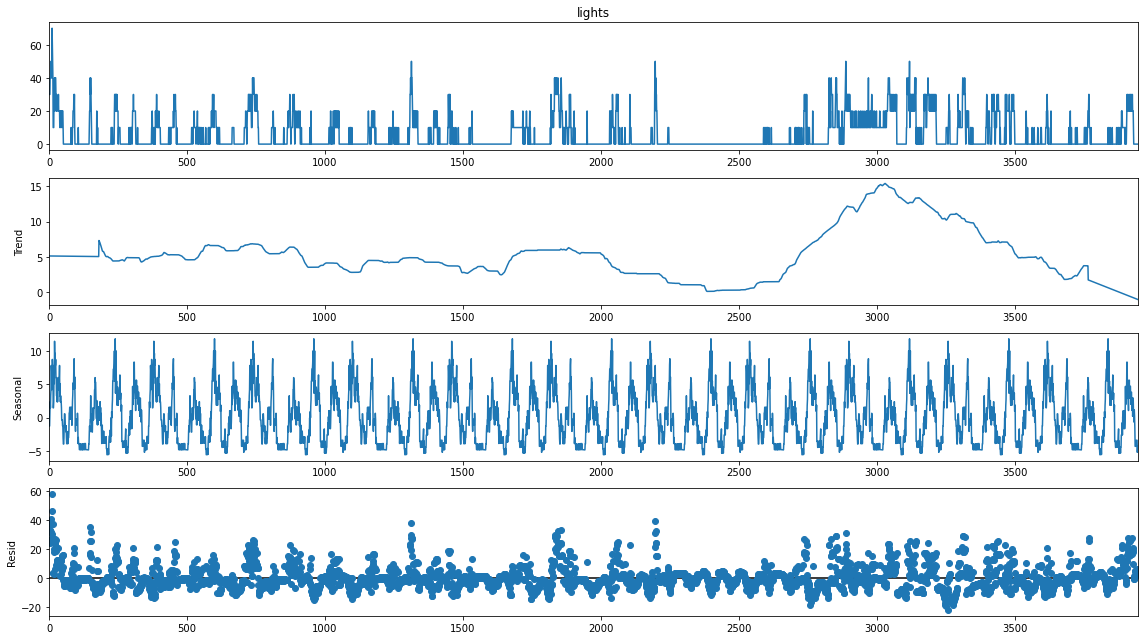

In [21]:
decomp = seasonal_decompose(exp_df['Appliances'],model = 'additive',period = 360,extrapolate_trend = 'freq')
fig = decomp.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

decomp = seasonal_decompose(exp_df['lights'],model = 'additive',period = 360,extrapolate_trend = 'freq')
fig = decomp.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

#### Feature scaling

Difference model due to non-stationarity

In [39]:
data = exp_df.drop(['date'], axis=1)

Check stationarity function to make sure that there is no more remaining non-stationary data.

In [40]:
data.index = exp_df.date
diff_data = data.diff().dropna()
for col in diff_data.columns[1:]:
    adf_test(col, diff_data[col])

#### Feature Selection

Used Granger Casuality to check for significant features

Appliances

In [41]:
target = diff_data.columns[0]
pred = diff_data.columns[1:]

In [42]:
results = {}
for predictor in pred:
    data = np.column_stack([diff_data[target], diff_data[predictor]])
    gc_res = grangercausalitytests(data, maxlag=2, verbose=False)
    results[predictor] = gc_res[2][0]['params_ftest'][1]

# Print the results
for predictor, p_value in sorted(results.items(), key=lambda x: x[1]):
    if p_value <= 0.05:
        print(f'{predictor}: {p_value:.4f}')

RH_1: 0.0000
T4: 0.0000
T3: 0.0000
RH_2: 0.0000
RH_3: 0.0000
T2: 0.0000
T1: 0.0002
lights: 0.0040
RH_9: 0.0047
RH_6: 0.0292
RH_7: 0.0293
RH_4: 0.0387


Lights

In [48]:
target = diff_data.columns[1]
pred = diff_data.columns[2:]

In [49]:
results = {}
for predictor in pred:
    data = np.column_stack([diff_data[target], diff_data[predictor]])
    gc_res = grangercausalitytests(data, maxlag=2, verbose=False)
    results[predictor] = gc_res[2][0]['params_ftest'][1]

# Print the results
for predictor, p_value in sorted(results.items(), key=lambda x: x[1]):
    if p_value <= 0.05:
        print(f'{predictor}: {p_value:.4f}')

T4: 0.0000
RH_3: 0.0003
RH_1: 0.0012
RH_7: 0.0064
Visibility: 0.0233
T3: 0.0464


Create dataframes for Features to be Used

In [50]:
data_app = diff_data[['RH_1', 'T4', 'T3', 'RH_2', 'RH_3', 'T2', 'T1', 'lights','RH_9', 'RH_6', 'RH_7', 'RH_4']]
data_lights = diff_data[['lights', 'T4', 'RH_3', 'RH_1', 'RH_7', 'Visibility', 'T3']]

## Short-list Promising Programs

#### VAR Model

In [28]:
exp_df.index.freq = 'd'
exp_df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       3937, 3938, 3939, 3940, 3941, 3942, 3943, 3944, 3945, 3946],
      dtype='object', length=3947)

In [34]:
# Predicting energy use by Appliances and lights
#diff_data = data.diff().dropna()
model = VAR(np.asarray(diff_data).astype(float))
sorted_order = model.select_order(2)
print(sorted_order.summary())

LinAlgError: 28-th leading minor of the array is not positive definite

In [30]:
model = VAR(np.asarray(diff_data).astype(float))
results = model.fit()
#results.summary()

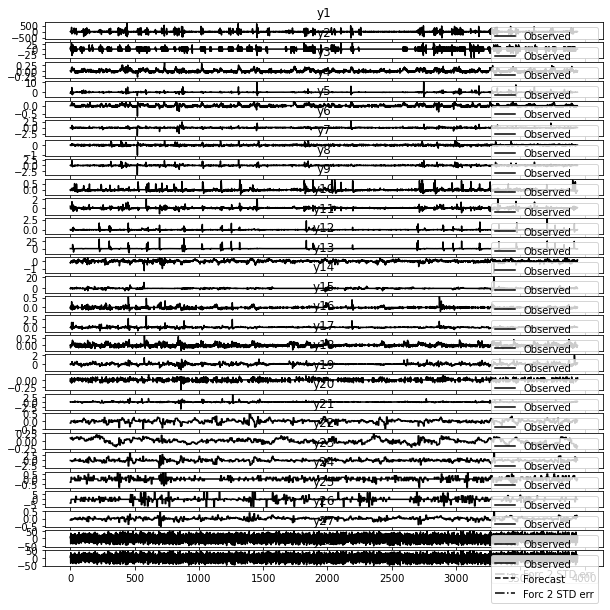

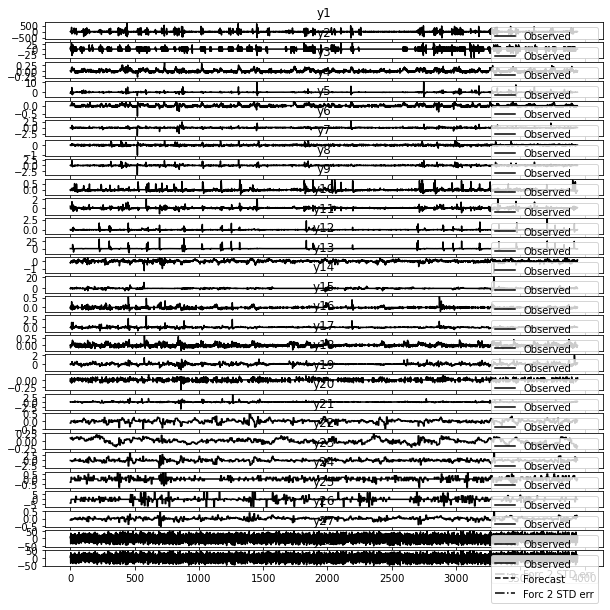

In [31]:
lag_order = results.k_ar
results.forecast(diff_data.values[-lag_order:],5)
results.plot_forecast(1)

#### LTSM Model

## Fine-Tune the System

In [32]:
plt.plot(train_samp_app[1:502],color='red')
plt.plot(predicted_result_app,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Appliances Energy')
plt.show()

NameError: name 'train_samp_app' is not defined

In [ ]:
plt.plot(train_samp[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Lights Energy')
plt.show()